# Home Credit Risk Modeling (Vedika)

## Table of Contents
## 1. [Introduction](#Introduction)
## 2. [Business Problem](#BP)
## 3. [Data Preparation](#DP)
## 4. [Data Modeling](#DM)
## 5. [Results](#Results)
## 6. [Conclusion](#C)

# Introduction<a id="Introduction"></a>

Home Credit, a global financial institution dedicated to enhancing financial inclusion, recognizes the challenge of identifying creditworthy individuals without traditional credit history. By leveraging advanced risk management models and alternative data sources such as telco and transactional information, Home Credit aims to ensure that deserving applicants are not rejected due to limitations in its current system. The objective is to enhance prediction models to accurately evaluate clients' repayment capacity, supporting their success by providing accessible financial services and fostering the development of a strong credit history. We aim to use data analysis techniques to identify the unbanked population capable of repayment, thus advancing Home Credit's mission of promoting financial inclusion and empowering individuals worldwide.

# Business Problem & Purpose of Notebook<a id="BP"></a>

Business Problem: Home Credit aims to pinpoint individuals within the unbanked demographic who have the capacity to repay loans but are being denied access due to their lack of conventional credit records. However, the existing system at Home Credit has shortcomings that could lead to the dismissal of creditworthy applicants.

Purpose of the Notebook: This notebook uses sophisticated algorithms and cutting-edge data analytic techniques to maximize the impact of Home Credit. The objective is to reduce the number of wrongful loan denials, increase the accuracy of loan rejections, and provide credit to applicants who deserve it by improving data analysis tools.

## Loading the Packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## Importing data

In [3]:
#reading the csv files 
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
b_balanced = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
cc_balance = pd.read_csv('credit_card_balance.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')
prev_app = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

## Exploring the Data

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
b_balanced.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [10]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# Data Preparation <a id="DP"></a>

### Feature Engineering

We will now combine the historical data with the current application data to enhance the creation of more comprehensive features for predictive modeling. By including the count of previous applications and past credits in the training and testing datasets, the model can make more accurate predictions on loan repayment probabilities.

In [12]:
#count of previous applications per applicant
prev_app_count = prev_app.groupby('SK_ID_CURR').size().reset_index(name = 'PREV_APP_COUNT')

#count of past credits per applicant
bureau_cc = bureau.groupby('SK_ID_CURR').size().reset_index(name = 'BUREAU_CREDIT_COUNT')

#merging the derived values with application train and test data
app_train = app_train.merge(prev_app_count, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_cc, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(prev_app_count, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_cc, on = 'SK_ID_CURR', how = 'left')

#filling the missing values with 0
app_train['PREV_APP_COUNT'] = app_train['PREV_APP_COUNT'].fillna(0)
app_train['BUREAU_CREDIT_COUNT'] = app_train['BUREAU_CREDIT_COUNT'].fillna(0)

app_test['PREV_APP_COUNT'] = app_test['PREV_APP_COUNT'].fillna(0)
app_test['BUREAU_CREDIT_COUNT'] = app_test['BUREAU_CREDIT_COUNT'].fillna(0)

#first 10 rows
print(app_train.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

### Exploring the Target Variable

In [13]:
#calculating the number of the TARGET variables that are 0 or 1 using value_counts()
majority = app_train['TARGET'].value_counts()
majority_count = pd.DataFrame({'Labels': majority.index,
                               'Values': majority.values})
majority_count.set_index('Labels', inplace = True)
majority_count

,Values
Labels,
0,282686
1,24825


### Plotting the majority class classifier

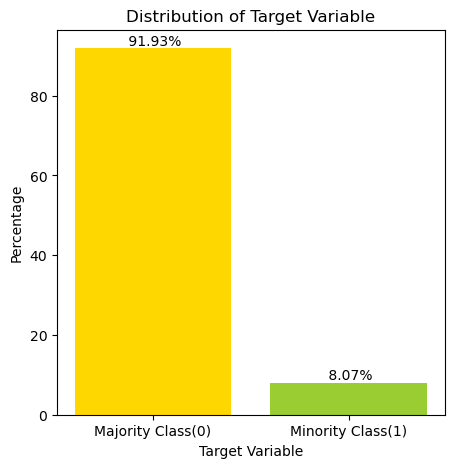

In [14]:
#calculating the percentage of 0 and 1 in TARGET
total = majority_count['Values'].sum()
percentage = majority_count['Values'] / total * 100

#storing the index as labels
labels = majority_count.index

#plotting the Distribution of the TARGET variable
plt.figure(figsize = (5,5))
bars = plt.bar(labels, percentage, color = ['gold', 'yellowgreen'])
plt.xlabel('Target Variable')
plt.ylabel('Percentage')
plt.xticks(labels,['Majority Class(0)', 'Minority Class(1)'])

#to print the data labels on top of the bars
for bar, percent in zip(bars, percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percent: .2f}%', ha = 'center', va = 'bottom')

plt.title('Distribution of Target Variable')
plt.show()

The majority class (0) with 91.93% states that the number of no defaulter are higher than defaulter (1) with 8.07%.

### Distribution of Defaults by Income Type

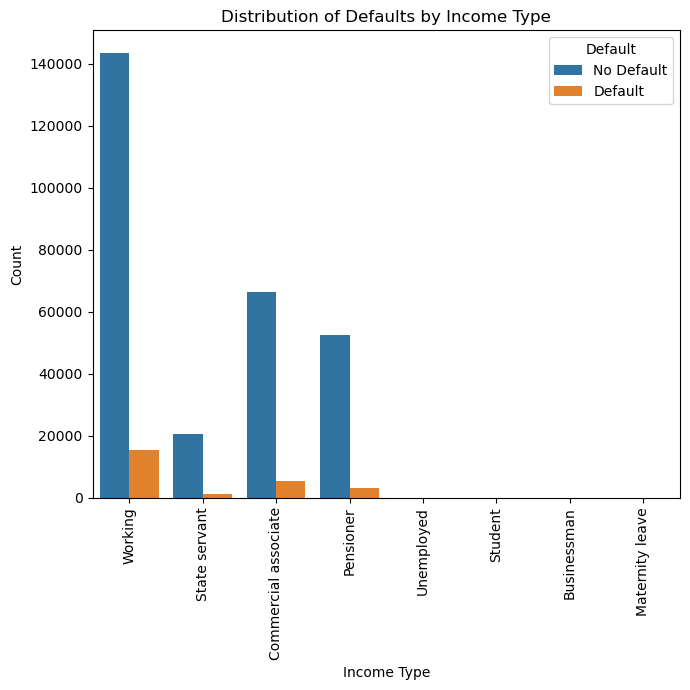

In [15]:
#plotting the Distribution of Defaults by income type
plt.figure(figsize=(7, 7))
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'TARGET', data = app_train)
plt.title('Distribution of Defaults by Income Type')
plt.xticks(rotation=90)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(title = 'Default', labels = ['No Default', 'Default'])
plt.tight_layout()
plt.show()

### Distrubution of Defaults by Gender

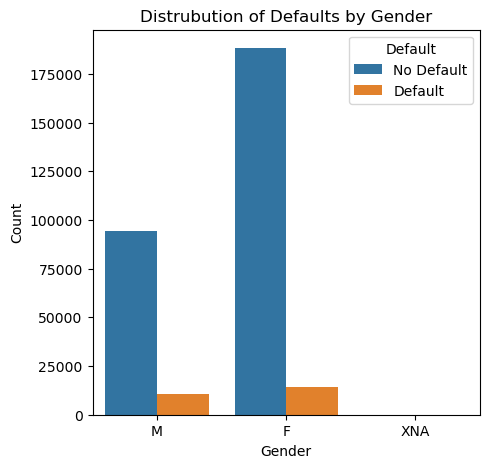

In [16]:
#plotting the Distribution of Defaults by gender
plt.figure(figsize = (5,5))
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = app_train)
plt.title('Distrubution of Defaults by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Default', labels = ['No Default', 'Default'])
plt.show()

### Distribution of AMT_GOODS_PRICE

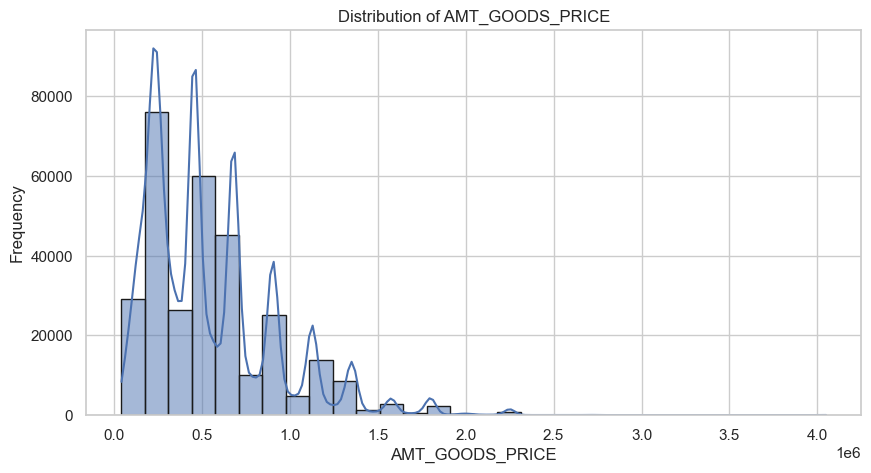

In [17]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
plt.title("Distribution of AMT_GOODS_PRICE")
sns.histplot(app_train["AMT_GOODS_PRICE"].dropna(), kde=True, bins=30, edgecolor='k')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.show()

Our dataset is very diverse, with a large number of missing values in some columns and a full population in others. To increase the precision and dependability of our predictive model, we must address the issues with missing values and outliers in several columns.

### Correlation Between Numeric Columns

In [18]:
numeric = app_train.select_dtypes(include = [np.number]).columns
correlations = app_train[numeric].corr()['TARGET'].sort_values()
print("Most positive correlations:\n", correlations.tail(10))
print("Most negative correlations:\n", correlations.head(10))

Most positive correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most negative correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


The output suggests that certain variables, like DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, and different FLAG_DOCUMENT and REG_CITY features, exhibit a positive correlation with the target. In contrast, features such as EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, and DAYS_EMPLOYED show significant negative correlations. This suggests that higher external source ratings and longer employment durations are associated with a reduced likelihood of loan default.

## Data Cleaning <a id="DC"></a>

### Looking into the missing Data

In [19]:
#counting the missing values and listing its percentage
app_train_copy = app_train.copy()
app_test_copy = app_test.copy()

missing_count = app_train_copy.isnull().sum()
missing_percentage = round((app_train_copy.isnull().mean() * 100), 2)

#creating a dataframe to store the same
missing_table = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_table = missing_table.sort_values('Missing Values', ascending = False)

#printing the head of the missing table
print(missing_table.head(60))

                              Missing Values  Percentage
COMMONAREA_MODE                       214865       69.87
COMMONAREA_AVG                        214865       69.87
COMMONAREA_MEDI                       214865       69.87
NONLIVINGAPARTMENTS_MEDI              213514       69.43
NONLIVINGAPARTMENTS_AVG               213514       69.43
NONLIVINGAPARTMENTS_MODE              213514       69.43
FONDKAPREMONT_MODE                    210295       68.39
LIVINGAPARTMENTS_MEDI                 210199       68.35
LIVINGAPARTMENTS_AVG                  210199       68.35
LIVINGAPARTMENTS_MODE                 210199       68.35
FLOORSMIN_MEDI                        208642       67.85
FLOORSMIN_AVG                         208642       67.85
FLOORSMIN_MODE                        208642       67.85
YEARS_BUILD_AVG                       204488       66.50
YEARS_BUILD_MODE                      204488       66.50
YEARS_BUILD_MEDI                      204488       66.50
OWN_CAR_AGE                    

In [20]:
#dropping the columns with more than 50% missing values except for 'OWN_CAR_AGE'
columns_drop = missing_percentage[missing_percentage > 50].index
columns_drop = [col for col in columns_drop if col != 'OWN_CAR_AGE']
app_train_copy = app_train_copy.drop(columns=columns_drop)
app_test_copy = app_test_copy.drop(columns=columns_drop)

### Imputing the missing data

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#seprating the numeric and categorical columns
numeric_col = app_train_copy.select_dtypes(include = 'number').columns
categorical_col = app_train_copy.select_dtypes(include='object').columns

numeric_col_test = app_test_copy.select_dtypes(include = 'number').columns
categorical_col_test = app_test_copy.select_dtypes(include='object').columns

#defining a pipeline for numeric columns
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median'))])

#defining a pipeline for categorical columns
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent'))])

#applying the pipeline to impute the missing values
app_train_copy[numeric_col] = num_pipeline.fit_transform(app_train_copy[numeric_col])
app_train_copy[categorical_col] = cat_pipeline.fit_transform(app_train_copy[categorical_col])

app_test_copy[numeric_col_test] = num_pipeline.fit_transform(app_test_copy[numeric_col_test])
app_test_copy[categorical_col_test] = cat_pipeline.fit_transform(app_test_copy[categorical_col_test])

### Categorical Variables Encoding

In [22]:
#identifying the categorical columns
categorical_col = app_train_copy.select_dtypes(include=['object']).columns

for col in categorical_col:
    app_train_copy[col] = pd.factorize(app_train_copy[col])[0]
    app_test_copy[col] = pd.factorize(app_test_copy[col])[0]

In [23]:
print(app_test_copy.shape)
print(app_train_copy.shape)

(48744, 83)
(307511, 84)


In the process of preparing data for analysis, we've taken a few essential steps. We checked for missing data in our datasets called app_train_copy and app_test_copy. If a column had more than half of its data missing, except for the 'OWN_CAR_AGE' column, we removed it.

Next, we filled in the missing data using a method called imputation. We used the middle value (median) for columns with numerical values, and for those with categorical values, we used the most common value. Lastly, we changed categorical data into factors to use them for analysis and modeling later on. This makes our datasets ready for the next steps in our work.

## Data Modeling <a id="DM"></a>

### Data Nomalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

#loading the pre-processed DataFrame
normalized_train = app_train_copy.copy()

#selecting numeric columns
num_col = normalized_train.select_dtypes(include=['int64', 'float64']).columns

#initializing the MinMaxScaler
scaler = MinMaxScaler()

#normalizing the numeric columns
normalized_train[num_col] = scaler.fit_transform(normalized_train[num_col])

#displaying the first few rows
normalized_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_APP_COUNT,BUREAU_CREDIT_COUNT
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.001512,0.090287,0.090032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.013699,0.068966
1,0.000003,0.0,0.0,0.5,0.0,1.0,0.0,0.002089,0.311736,0.132924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.041096,0.034483
2,0.000006,0.0,1.0,0.0,1.0,0.0,0.0,0.000358,0.022472,0.020025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.013699,0.017241
3,0.000011,0.0,0.0,0.5,0.0,0.0,0.0,0.000935,0.066837,0.109477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.123288,0.000000
4,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000819,0.116854,0.078975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.082192,0.008621


### Feature Selection using Recursive Feature Elimination

In [29]:
#separating the target variable
Xn = normalized_train.drop('TARGET', axis = 1)
Yn = normalized_train.TARGET

#splitting the data into training and validation sets
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size = 30, random_state = 0, stratify = Yn)

#initializing a logistics regression model
log_reg = LogisticRegression()

#initializing RFE
rfe = RFE(estimator = log_reg, n_features_to_select = 10)

#fitting RFE
rfe.fit(Xn_train, Yn_train)

#getting selected features
selected_feat = Xn_train.columns[rfe.support_]

#subsetting the training and testing data with selected features
X_train_selected = Xn_train[selected_feat]
X_test_selected = Xn_test[selected_feat]

#training logistic regression model
log_model_selected = LogisticRegression()
log_model_selected.fit(X_train_selected, Yn_train)

#predicting the target variable
pred_selected = log_model_selected.predict(X_test_selected)

#evaluating the model performance
acc_selected = accuracy_score(Yn_test, pred_selected)
print("Accuracy:", acc_selected)

AR_selected = roc_auc_score(Yn_test, log_model_selected.predict_proba(X_test_selected)[:, 1]).round(4)
print("AUC-ROC:", AR_selected)

Accuracy: 0.9333333333333333
AUC-ROC: 0.6071


### Prediction on Test Data

In [30]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = rfe.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_rfe_trial.csv",index=False)

The Recursive Feature Elimination (RFE) technique was used along with a logistic regression model to identify the most significant features for predicting a target variable. This approach yielded a remarkable accuracy of 93.33% and an AUC-ROC score of 0.6071 on the validation set. The chosen features are then utilized to make predictions on the test data, and the outcomes submitted to Kaggle resulted in a score of 0.500.

### XGBoost

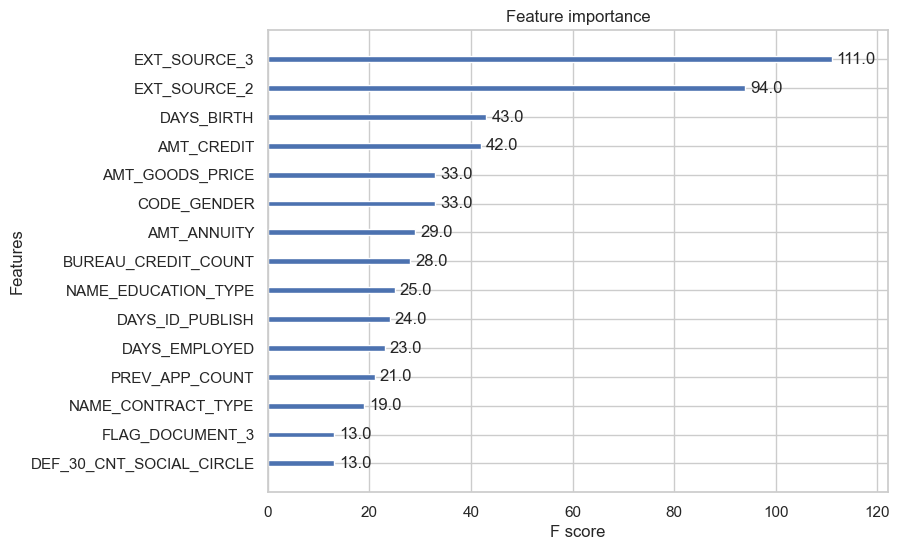

Accuracy: 0.9333333333333333
AUC_ROC: 0.5536
Mean cross-validation accuracy: 0.9194389248790781


In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

#separating the target variable
X = app_train_copy.drop('TARGET', axis = 1)
Y = app_train_copy.TARGET

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 30, random_state = 0, stratify = Y)


#creating the XGBClassifier Obejct
model_xgb = xgb.XGBClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.1, random_state = 10, n_jobs = -1)

#training the model
model_xgb.fit(X_train, Y_train)

#plotting the feature importance
fig, ax = plt.subplots(figsize = (8,6))
xgb.plot_importance(model_xgb, ax = ax, max_num_features = 15)
plt.show()

#making prediction
pred = model_xgb.predict(X_test)

#evaluating the model
print("Accuracy:", accuracy_score(Y_test, pred))
print("AUC_ROC:", roc_auc_score(Y_test, model_xgb.predict_proba(X_test)[:, 1]).round(4))

#cross validation
cv_scores = cross_val_score(model_xgb, X_train, Y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("Mean cross-validation accuracy:", cv_scores.mean())

We utilized the XGBClassifier on a dataset and generated a visualization of the top 15 features, highlighting EXT_SOURCE_3, EXT_SOURCE_2, and DAYS_BIRTH as the most significant factors in predicting the target variable. The model achieves an accuracy of 0.933 and an AUC-ROC score of 0.5536. It also demonstrates a mean cross-validation accuracy of 0.9194, indicating consistent performance across various subsets of the training data.

### Prediction on Test Data

In [32]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = model_xgb.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_xgb_trial.csv",index=False)

The Kaggle score for XGBoost is 0.685

## Upsampling & Downsampling the xgboost model

Upsampling is used to increase the number of instances in the minority class, while downsampling decreases the instances in the majority class. Both techniques aim to improve model performance by addressing class imbalance, which can lead to skewed models that struggle to generalize to unseen data. The upsampled model's predictions are then prepared for submission due its superior performance metrics.

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#separating the target variable
X = app_train_copy.drop('TARGET', axis = 1)
Y = app_train_copy.TARGET

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 20, random_state = 0, stratify = Y)

#upsampling the minority class using smote
smote = SMOTE(random_state = 0)
X_train_upsampled, Y_train_upsampled = smote.fit_resample(X_train, Y_train)

#downsampling the majority class
rus = RandomUnderSampler(random_state = 0)
X_train_downsampled, Y_train_downsampled = rus.fit_resample(X_train, Y_train)

#creating the XGBClassifier object
model_xgb_up = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=10, n_jobs=-1)
model_xgb_down = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=10, n_jobs=-1)

#upsampled data
model_xgb_up.fit(X_train_upsampled, Y_train_upsampled)
pred_upsampled = model_xgb_up.predict(X_test)
print("Upsampled Data:")
print("Accuracy:", accuracy_score(Y_test, pred_upsampled))
print("AUC_ROC:", roc_auc_score(Y_test, model_xgb_up.predict_proba(X_test)[:, 1]).round(4))

#downsampled data
model_xgb_down.fit(X_train_downsampled, Y_train_downsampled)
pred_downsampled = model_xgb_down.predict(X_test)
print("Downsampled Data:")
print("Accuracy:", round(accuracy_score(Y_test, pred_downsampled), 4))
print("AUC_ROC:", roc_auc_score(Y_test, model_xgb_down.predict_proba(X_test)[:, 1]).round(4))

Upsampled Data:
Accuracy: 0.9
AUC_ROC: 0.5556
Downsampled Data:
Accuracy: 0.65
AUC_ROC: 0.6667


Using SMOTE for upsampling and RandomUnderSampler for downsampling, we can balance the class distribution in a dataset. This balanced dataset will then be used to train two separate XGBoost classifiers. The accuracy of the upsampled model is 0.933 with an AUC_ROC of 0.55, while the downsampled model has an accuracy of 0.65 and an AUC_ROC of 0.6667. 

### Prediction on Test Data - upsampling

In [34]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = model_xgb_up.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_yp_trial.csv",index=False)

The XGBoost classifier, after handling class imbalance through upsampling with SMOTE, achieved a Kaggle score of 0.616, indicating that the technique downgraded the model's capacity to generalize and make predictions on unseen data.

### Prediction on Test Data - downsampling

In [35]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = model_xgb_down.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_down_trial.csv",index=False)

The XGBoost classifier, after handling class imbalance through downsampling, achieved a Kaggle score of 0.6855, indicating that the technique slightly enhanced the model's capacity to generalize and make predictions on unseen data.

## Results <a id="Results"></a>

### Model Comparison

**Logistic Regression Model with RFE:**
<br>
The RFE-selected features gave us an AUC-ROC score of 0.6071, indicating good prediction quality. However, the Kaggle score (0.50017) is not the highest among the models.
<br>
<br>
**Models using XGBoost:**
<br>
The downsampling technique notably improved the XGBoost model's discriminatory power, achieving an AUC_ROC of 0.6667. Despite a decrease in accuracy, this approach effectively addressed class imbalance, enhancing the model's ability to identify borrowers capable of repayment. Remarkably, the Kaggle score remained stable at 0.685, affirming the downsampling's success in maintaining competitive performance on unseen data. Consequently, downsampling emerges as a favorable choice, balancing improved discriminatory ability with consistent predictive performance for Home Credit's loan approval process

## Conclusion <a id="C"></a>

For Home Credit, the downsampled XGBoost model comes highly recommended. This model received the highest Kaggle score in addition to exhibiting outstanding AUC-ROC performance. For Home Credit's prediction tasks, this high score shows that it can generalize to new data effectively, which is essential. Before implementing the model, it would be advantageous to investigate optimization approaches further in order to potentially improve it. This could mean utilizing additional methods, modifying hyperparameters, or optimizing feature engineering strategies. Through iterative technique refinement, we hope to optimize the predictive power of the model and guarantee its dependability in practical applications.